In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.embeddings import Embedding
import logging
import numpy as np
import pandas as pd
import math
import numpy as np

Using TensorFlow backend.


In [2]:
#將人工標註結果載入
y_train = []
data_path = r"C:\Users\peihsuan\Downloads\18check_correct_inwholeA\train_text_whole.txt"
df = pd.read_csv(data_path,encoding='big5')  
y_train = df['label']

In [4]:
#自第862筆起，都是作答未含有A的部分，因此皆為0
print(y_train[862:872])

862    0
863    0
864    0
865    0
866    0
867    0
868    0
869    0
870    0
871    0
Name: label, dtype: int64


In [58]:
#將學生答案載入
train_text = []
data_path = r"C:\Users\peihsuan\Downloads\18check_correct_inwholeA\text_embedding_whole.csv"
#df = pd.read_csv(data_path,encoding= 'big5',names=['text','embeddings'])  
df = pd.read_csv(data_path,encoding= 'utf-8',sep = ';') 
train_text = df['text']

In [59]:
print(train_text[862:872])

862    生命
863    植物
864    自然
865    自然
866    褐色
867    自然
868    棕色
869    堅硬
870    曲線
871    影子
Name: text, dtype: object


In [60]:
#將文字embedding作為其中一項feature儲存
x_train_seq_tmp = []
x_train_seq_tmp = df['embeddings']

In [61]:
#將embedding轉為數字陣列
tmp = []
x_train_seq = []
for items in range(0,len(x_train_seq_tmp)):
    tmp=np.fromstring(x_train_seq_tmp[items], dtype=float, sep=',')
    x_train_seq.append(tmp)
    tmp = []

In [62]:
print(len(train_text))

1672


In [63]:
print(len(y_train))

1672


In [64]:
print(len(x_train_seq[872]))

250


In [65]:
print((x_train_seq[872]))

[-0.17871532  0.3275969  -0.13815549  0.11346178  0.07406721 -0.05331555
  0.09324779 -0.03590165 -0.12160562  0.37375319  0.05066568 -0.09996205
  0.30667022  0.08060334 -0.12705292 -0.18542612  0.10800983 -0.04439498
 -0.09449241  0.01066216  0.22533655 -0.28405926 -0.16298757 -0.06576513
 -0.03786943 -0.30001861 -0.21145546  0.208505   -0.07067376  0.29221401
  0.05062958 -0.09955449  0.13321896  0.04315663  0.23640817  0.17135614
 -0.05146843  0.02787131 -0.36337423  0.27222037  0.00338677  0.1918648
 -0.06468341  0.16913645  0.0768724   0.0007758  -0.23786333 -0.04142836
 -0.02507459  0.04917258 -0.26214105  0.03045104 -0.07877079  0.01853572
  0.30149296  0.2289355   0.12401126 -0.25070283 -0.2238979  -0.36232638
  0.01663214 -0.05234717  0.02572026 -0.00474615 -0.14160311  0.06501351
 -0.04393177 -0.14246726 -0.25501508  0.38475609 -0.05502664  0.17686668
 -0.15825549 -0.09729473  0.01762843  0.0800174  -0.18913019 -0.37965769
  0.08869988  0.39510483 -0.15453562  0.2141884  -0.

In [66]:
#將訓練資料切分為訓練及測試
train_size = int(len(train_text) * 0.8)
train_textembedding, test_textembedding = x_train_seq[:train_size], x_train_seq[train_size:]
y_train_predict, y_test_predict = y_train[:train_size],y_train[train_size:]

In [68]:
#建立模型
#* 平坦層: 共有 3,200 = 32 * 100 個神經元, 共有 100 個 Token 數字, 每一個 Token 使用 32 維度來表示數字 1-2000.
#* 平坦層: 共有 250 個 Token 數字, 每一個 Token 使用 250 維度來表示數字 1.
#* 隱藏層: 共有 256 個神經元
#* 輸出層: 只有一個神經元. 1 表示正面; 0 表示負面.

model = Sequential()
#model.add(Embedding(output_dim=32,  input_dim=2000,  input_length=100))  
#model.add(Embedding(output_dim=250,  input_dim=11,  input_length=250))
#model.add(Dropout(0.2))
#model.add(Flatten())
model.add(Dense(units=100,activation='relu',input_dim=250))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid' ))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               25100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 25,201
Trainable params: 25,201
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
train_history =model.fit(np.array(train_textembedding), np.array(y_train_predict),batch_size=10, epochs=5,verbose=2,validation_split=0.2)

Train on 1069 samples, validate on 268 samples
Epoch 1/5
 - 0s - loss: 0.4704 - acc: 0.7989 - val_loss: 0.2060 - val_acc: 0.9851
Epoch 2/5
 - 0s - loss: 0.3176 - acc: 0.8765 - val_loss: 0.1513 - val_acc: 0.9851
Epoch 3/5
 - 0s - loss: 0.2489 - acc: 0.9074 - val_loss: 0.1358 - val_acc: 0.9701
Epoch 4/5
 - 0s - loss: 0.2101 - acc: 0.9308 - val_loss: 0.1715 - val_acc: 0.9366
Epoch 5/5
 - 0s - loss: 0.1850 - acc: 0.9373 - val_loss: 0.1462 - val_acc: 0.9366


In [71]:
%pylab inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


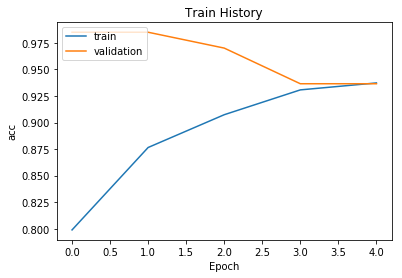

In [72]:
show_train_history(train_history,'acc','val_acc')

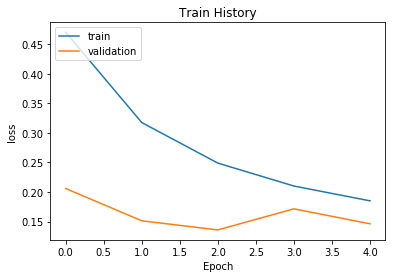

In [73]:
show_train_history(train_history,'loss','val_loss')

In [74]:
#測試準確率
scores = model.evaluate(np.array(test_textembedding), np.array(y_test_predict), verbose=1)
scores[1]

335/335 [==============================] - 0s 17us/step


0.8985074630424158

In [75]:
#預測機率
probility=model.predict(np.array(test_textembedding))

In [76]:
predict=model.predict_classes(np.array(test_textembedding))

In [77]:
predict.shape

(335, 1)

In [78]:
predict_classes=predict.reshape(335)

In [79]:
SentimentDict={1:'屬於A',0:'不屬於A'}
def display_test_Sentiment(i):
    print(train_text[i])
    print('標籤label:',SentimentDict[y_train[i]],'預測結果:',SentimentDict[predict_classes[i]])

In [81]:
for i in range(321,335):
    display_test_Sentiment(i)
    print("\n")

白色
標籤label: 屬於A 預測結果: 屬於A


每日
標籤label: 不屬於A 預測結果: 不屬於A


碰到
標籤label: 不屬於A 預測結果: 不屬於A


裡面
標籤label: 不屬於A 預測結果: 不屬於A


包含
標籤label: 不屬於A 預測結果: 不屬於A


東西
標籤label: 屬於A 預測結果: 不屬於A


濕
標籤label: 不屬於A 預測結果: 不屬於A


不
標籤label: 不屬於A 預測結果: 不屬於A


舒服
標籤label: 不屬於A 預測結果: 不屬於A


破壞
標籤label: 不屬於A 預測結果: 不屬於A


改變
標籤label: 不屬於A 預測結果: 不屬於A


造型
標籤label: 不屬於A 預測結果: 不屬於A


白色
標籤label: 屬於A 預測結果: 屬於A


白色
標籤label: 屬於A 預測結果: 不屬於A


